## Notebook for the finding of sex-covariates
### Developed by: Anna Maguza

### Institute of Computational Biology - Computational Health Centre - Hemlholtz Munich

### 12 October 2022

This notebook was developed separately because pybiomart package that is needed to this analysis is incompetible with some packages in my main environment, therefore, I have created a new environment

#### Load required packages

In [3]:
import numpy as np
import pandas as pd
import pybiomart as bm
import scanpy as sc

#### Setup Cells

In [5]:
%matplotlib inline

In [6]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.1 numpy==1.23.3 scipy==1.9.1 pandas==1.5.0 scikit-learn==1.1.2 statsmodels==0.13.2 pynndescent==0.5.7


## Khaliq-2022

#### Uploading data

In [7]:
#Khaliq-2022
input_CRC_file = '/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Anna-Master-Project/khaliq_2022_anndata_raw.h5ad'  # the file that will store the analysis results
output_CRC_file = '/Users/annamaguza/Desktop/Desktop-Anna/LMU/Master-Thesis/Anna-Master-Project/khaliq_2022_anndata_processed.h5ad'  # the file that will store the analysis results

In [8]:
#Anndata upload
khaliq_ad = sc.read_h5ad(input_CRC_file)
khaliq_ad.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
#Delete normal samples (leave only tumor)
khaliq_ad_tumor = khaliq_ad[khaliq_ad.obs.Condition == "Tumor", :]

In [4]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [10]:
annot.head()

,ensembl_gene_id,start_position,end_position,chromosome_name
external_gene_name,,,,
MT-TF,ENSG00000210049,577,647,MT
MT-RNR1,ENSG00000211459,648,1601,MT
MT-TV,ENSG00000210077,1602,1670,MT
MT-RNR2,ENSG00000210082,1671,3229,MT
MT-TL1,ENSG00000209082,3230,3304,MT


In [20]:
chrY_genes = khaliq_ad_tumor.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['RPS4Y1', 'ZFY', 'ZFY-AS1', 'LINC00278', 'TBL1Y', 'USP9Y', 'DDX3Y',
       'UTY', 'TMSB4Y', 'NLGN4Y', 'FAM224B', 'TTTY14', 'KDM5D', 'TTTY10',
       'EIF1AY', 'RPS4Y2', 'PRORY', 'DAZ1'],
      dtype='object')

In [26]:
khaliq_ad_tumor.obs

,samples,Condition,Location,MSI_Status,bulk_prediction,prediction,percent_chrY,XIST-counts
T_cac1_AAACCTGAGAATAGGG,T_cac1,Tumor,Right,MSS,CMS4,CMS2,NaN,0.0
T_cac1_AAACCTGAGCAGCGTA,T_cac1,Tumor,Right,MSS,CMS4,CMS4,NaN,0.0
T_cac1_AAACCTGCAATCTGCA,T_cac1,Tumor,Right,MSS,CMS4,CMS3,NaN,0.0
T_cac1_AAACCTGGTCTTGCGG,T_cac1,Tumor,Right,MSS,CMS4,CMS3,NaN,0.0
T_cac1_AAACCTGGTGTGCCTG,T_cac1,Tumor,Right,MSS,CMS4,CMS3,NaN,0.0
...,...,...,...,...,...,...,...,...
T_cac9_TTTGGTTCAACACGCC,T_cac9,Tumor,Left,MSS,CMS2,CMS4,NaN,0.0
T_cac9_TTTGGTTCATAGACTC,T_cac9,Tumor,Left,MSS,CMS2,CMS4,NaN,0.0
T_cac9_TTTGGTTCATCTATGG,T_cac9,Tumor,Left,MSS,CMS2,CMS1,NaN,0.0
T_cac9_TTTGGTTTCAATCTCT,T_cac9,Tumor,Left,MSS,CMS2,CMS1,NaN,0.0


In [25]:
khaliq_ad_tumor.obs["XIST-counts"] = khaliq_ad_tumor.X[:,khaliq_ad_tumor.var_names.str.match('XIST')]

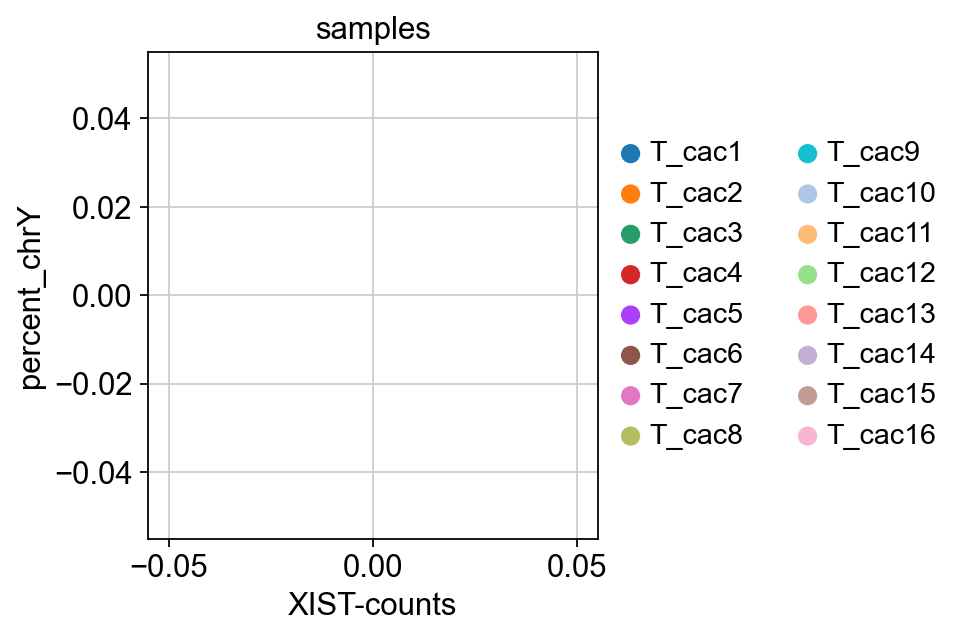

In [27]:
sc.pl.scatter(khaliq_ad_tumor, x = 'XIST-counts', y = 'percent_chrY', color = "samples")

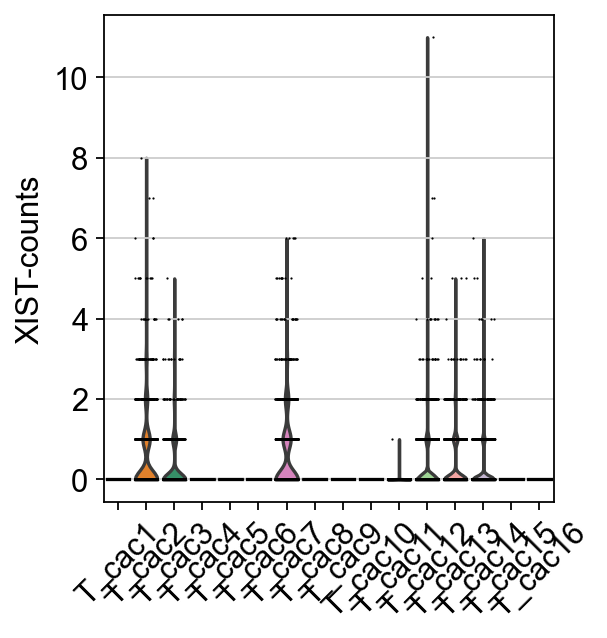

In [29]:
sc.pl.violin(khaliq_ad_tumor, ["XIST-counts"], jitter = 0.4, groupby = 'samples', rotation = 45)

In [32]:
khaliq_ad_tumor.obs['percent_chrY'] = np.sum(khaliq_ad_tumor[:, chrY_genes].X, axis = 1)/np.sum(khaliq_ad_tumor.X, axis = 1)*100

AttributeError: 'ArrayView' object has no attribute 'A1'

In [33]:
np.sum(khaliq_ad_tumor[:, chrY_genes].X, axis = 1)

ArrayView([ 0., 17.,  0., ...,  4.,  0.,  5.], dtype=float32)

In [35]:
np.sum(khaliq_ad_tumor.X, axis = 1)

array([  922., 11519.,   831., ...,  3283.,   995.,  3251.], dtype=float32)

In [36]:
np.sum(khaliq_ad_tumor[:, chrY_genes].X, axis = 1)/np.sum(khaliq_ad_tumor.X, axis = 1)

ArrayView([0.        , 0.00147582, 0.        , ..., 0.0012184 ,
           0.        , 0.00153799], dtype=float32)

In [37]:
np.sum(khaliq_ad_tumor[:, chrY_genes].X, axis = 1)/np.sum(khaliq_ad_tumor.X, axis = 1)*100

ArrayView([0.        , 0.14758225, 0.        , ..., 0.12183978,
           0.        , 0.15379883], dtype=float32)

In [38]:
khaliq_ad_tumor.obs['percent_chrY'] = np.sum(khaliq_ad_tumor[:, chrY_genes].X, axis = 1)/np.sum(khaliq_ad_tumor.X, axis = 1)*100

In [39]:
khaliq_ad_tumor.obs

,samples,Condition,Location,MSI_Status,bulk_prediction,prediction,percent_chrY,XIST-counts
T_cac1_AAACCTGAGAATAGGG,T_cac1,Tumor,Right,MSS,CMS4,CMS2,NaN,0.0
T_cac1_AAACCTGAGCAGCGTA,T_cac1,Tumor,Right,MSS,CMS4,CMS4,NaN,0.0
T_cac1_AAACCTGCAATCTGCA,T_cac1,Tumor,Right,MSS,CMS4,CMS3,NaN,0.0
T_cac1_AAACCTGGTCTTGCGG,T_cac1,Tumor,Right,MSS,CMS4,CMS3,NaN,0.0
T_cac1_AAACCTGGTGTGCCTG,T_cac1,Tumor,Right,MSS,CMS4,CMS3,NaN,0.0
...,...,...,...,...,...,...,...,...
T_cac9_TTTGGTTCAACACGCC,T_cac9,Tumor,Left,MSS,CMS2,CMS4,NaN,0.0
T_cac9_TTTGGTTCATAGACTC,T_cac9,Tumor,Left,MSS,CMS2,CMS4,NaN,0.0
T_cac9_TTTGGTTCATCTATGG,T_cac9,Tumor,Left,MSS,CMS2,CMS1,NaN,0.0
T_cac9_TTTGGTTTCAATCTCT,T_cac9,Tumor,Left,MSS,CMS2,CMS1,NaN,0.0
